# ПРАКТИКУМ: ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ

    Практические задания для самостоятельной работы

     Цели практикума:,
    "- Освоить основные алгоритмы кластеризации",
    "- Научиться применять методы снижения размерности",
    "- Освоить техники обнаружения аномалий",
    "- Развить навыки интерпретации результатов",
    "- Понять критерии оценки качества",
    Структура работы:

1. Подготовка данных и EDA
2. Кластеризация (K-Means, Hierarchical, DBSCAN)
3. Снижение размерности (PCA, t-SNE)
4. Обнаружение аномалий
5. Анализ и интерпретация результатов


## БЛОК 1: Импорт библиотек и настройка окружения

In [1]:
# Основные библиотеки для работы с данными
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Основные библиотеки загружены")

Основные библиотеки загружены


In [2]:
# Библиотеки машинного обучения
from sklearn.datasets import make_blobs, make_circles, make_moons, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Алгоритмы кластеризации
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Снижение размерности
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Обнаружение аномалий
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Метрики качества
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Иерархическая кластеризация
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

print("Библиотеки машинного обучения загружены")

Библиотеки машинного обучения загружены


## БЛОК 2: Подготовка и исследование данных

In [3]:
# ЗАДАЧА 2.1: Загрузка и первичный анализ данных
from sklearn.datasets import load_wine
import pandas as pd

# --- ЗАГРУЗКА ДАННЫХ ---
wine = load_wine()

# Создаём DataFrame из данных + целевой переменной
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

# --- БАЗОВОЕ ИССЛЕДОВАНИЕ ДАТАСЕТА ---
print("=== SHAPE (размер датасета) ===")
print(df.shape)

print("\n=== INFO (структура данных) ===")
print(df.info())

print("\n=== DESCRIBE (статистики) ===")
print(df.describe())

print("\n=== HEAD (первые 5 строк) ===")
print(df.head())

# --- ОТВЕТЫ НА ВОПРОСЫ ТЕОРИИ ---
print("\n=== Названия признаков ===")
print(wine.feature_names)

print("\n=== Количество классов (target) ===")
print(len(set(wine.target)))

print("\n=== Значения классов ===")
print(set(wine.target))

print("\n=== Проверка пропущенных значений ===")
print(df.isnull().sum())


=== SHAPE (размер датасета) ===
(178, 14)

=== INFO (структура данных) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    fl

<Figure size 1200x1000 with 0 Axes>

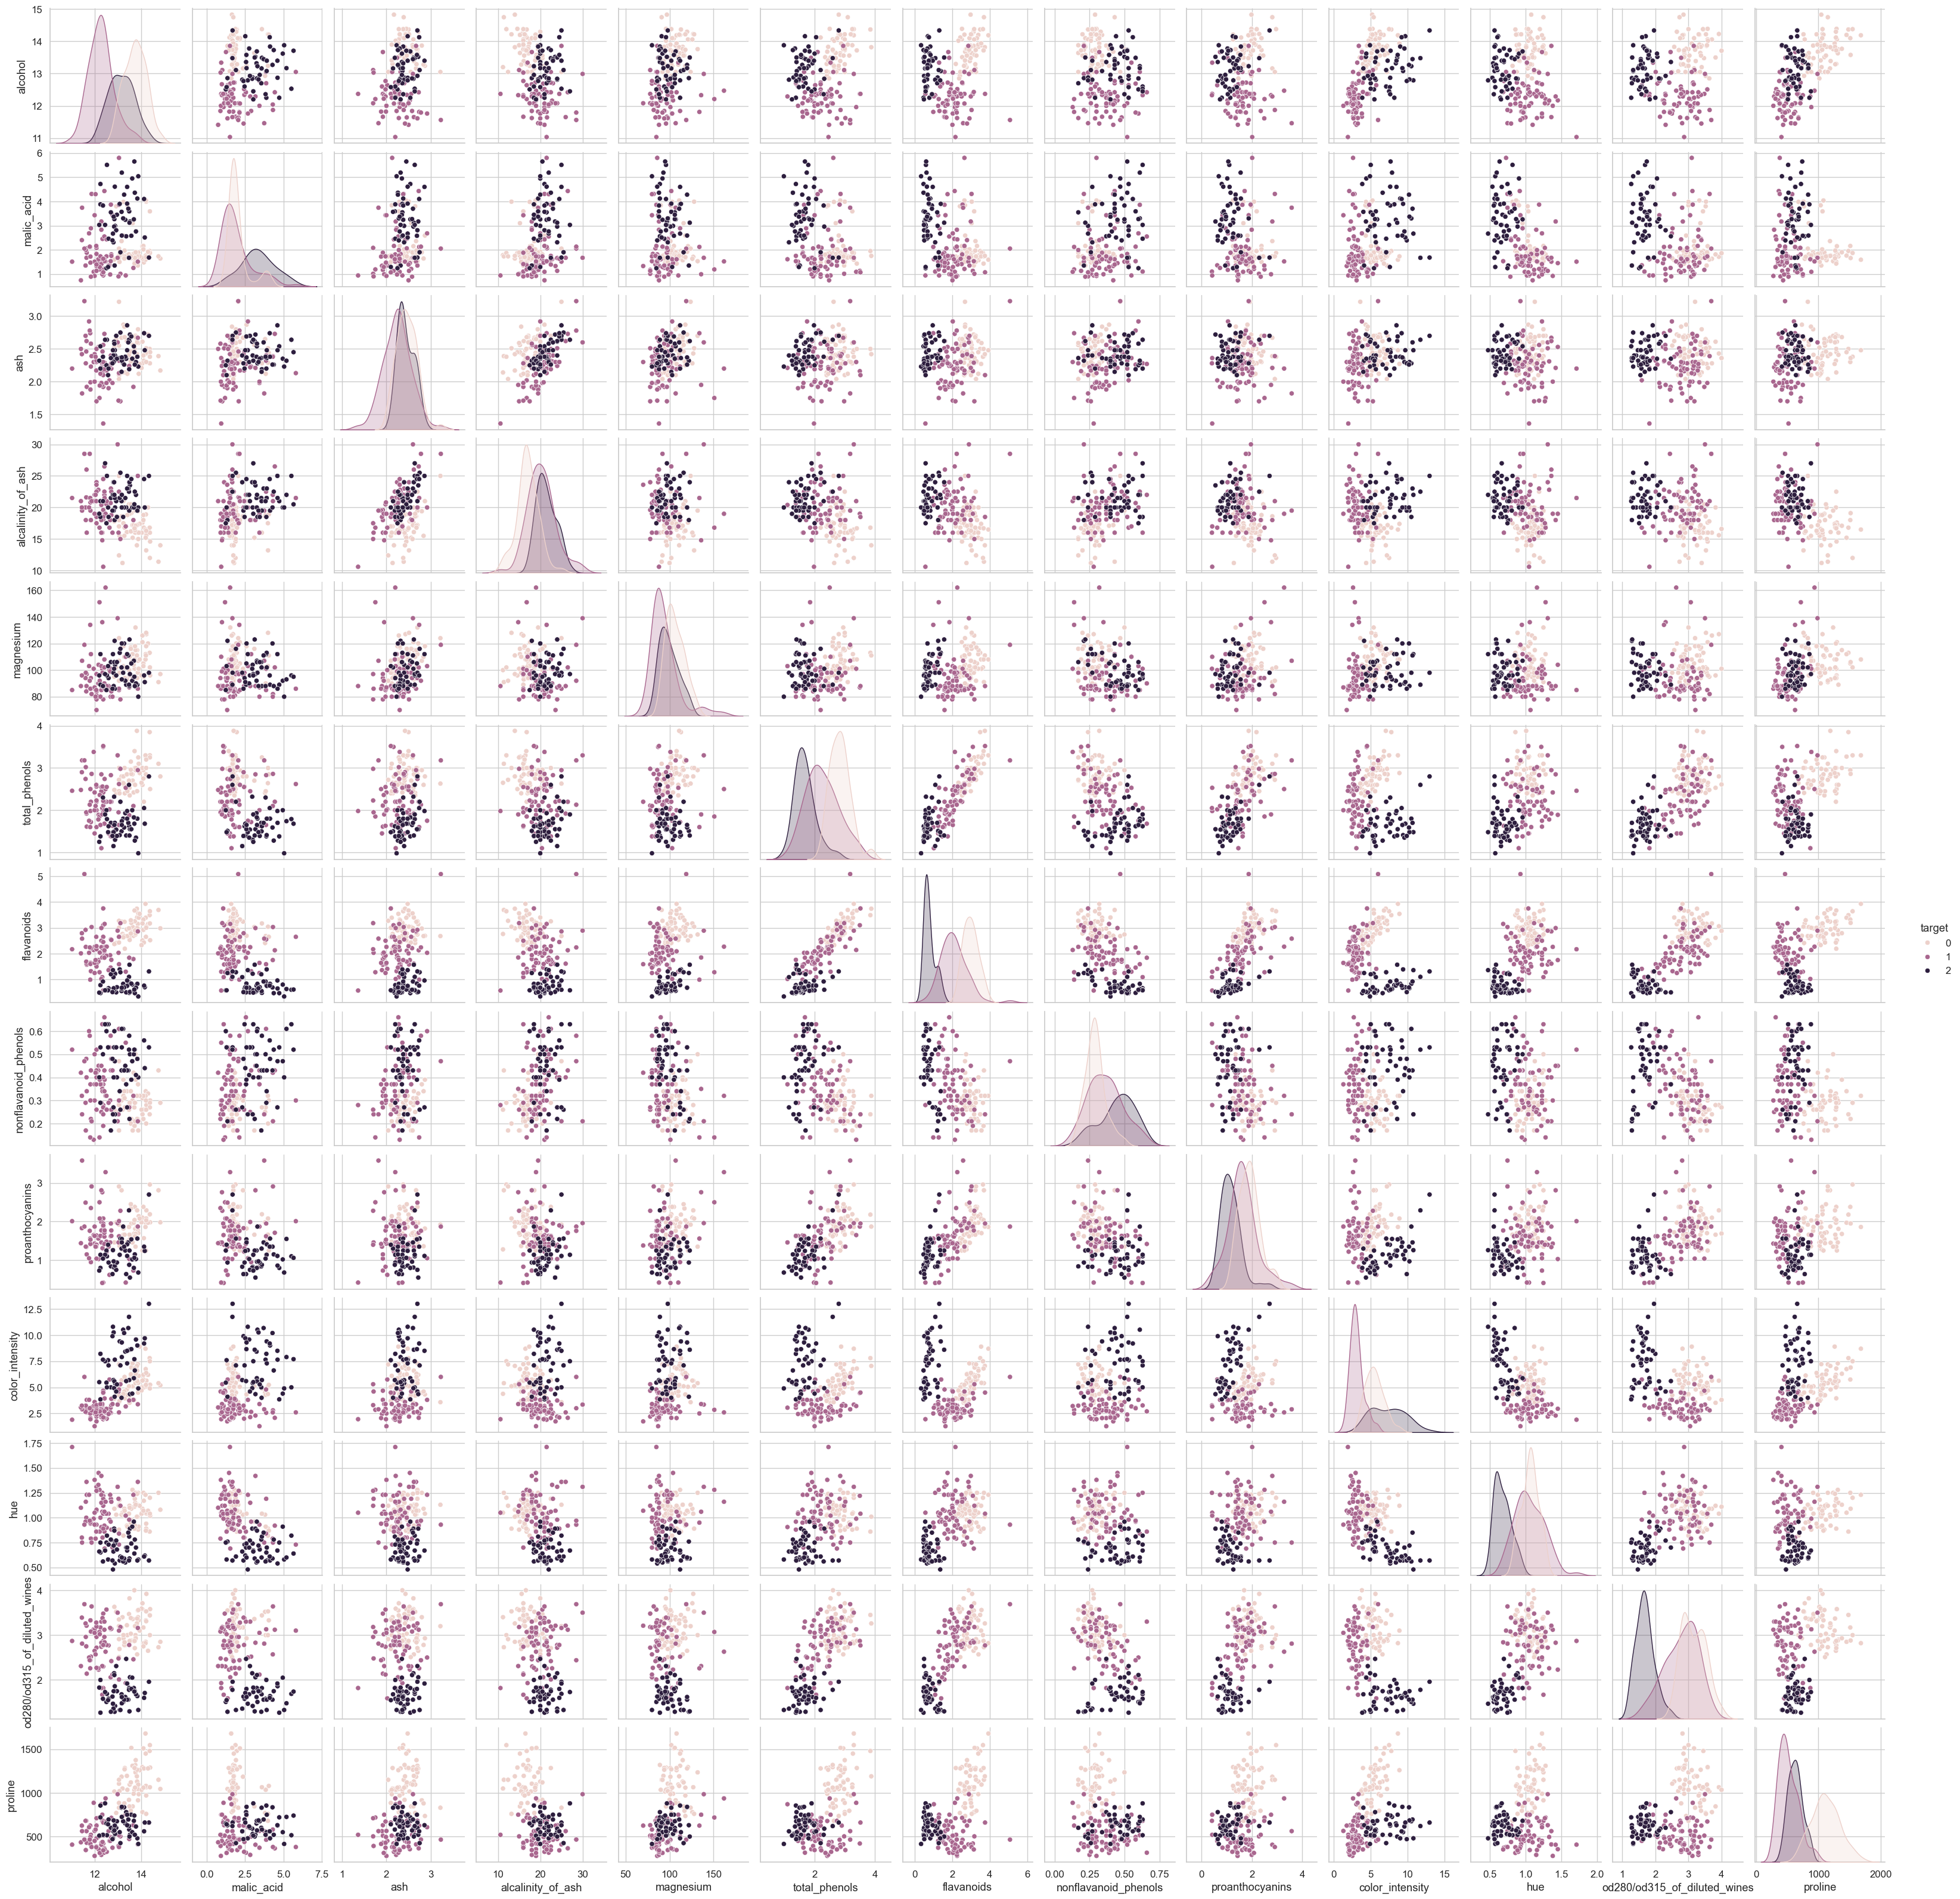

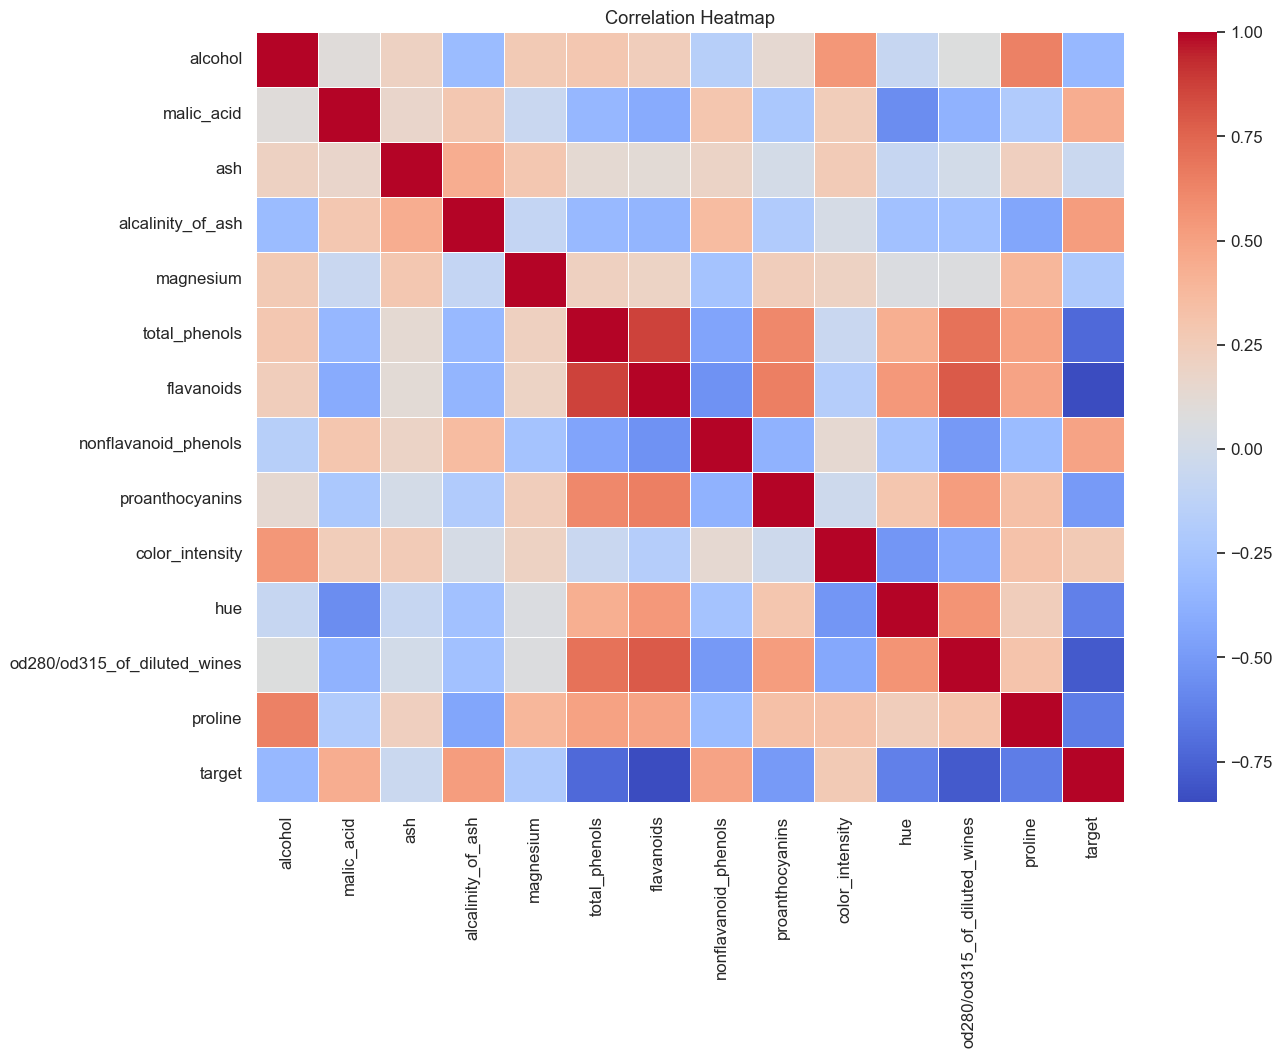

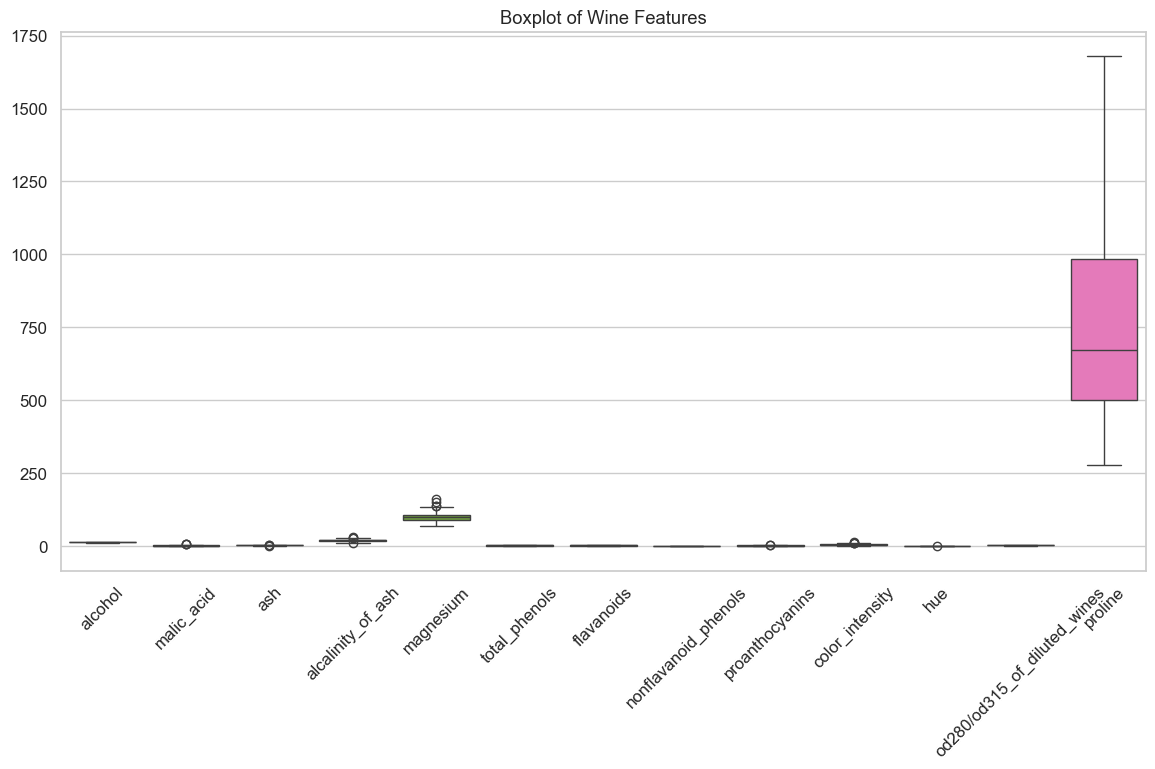

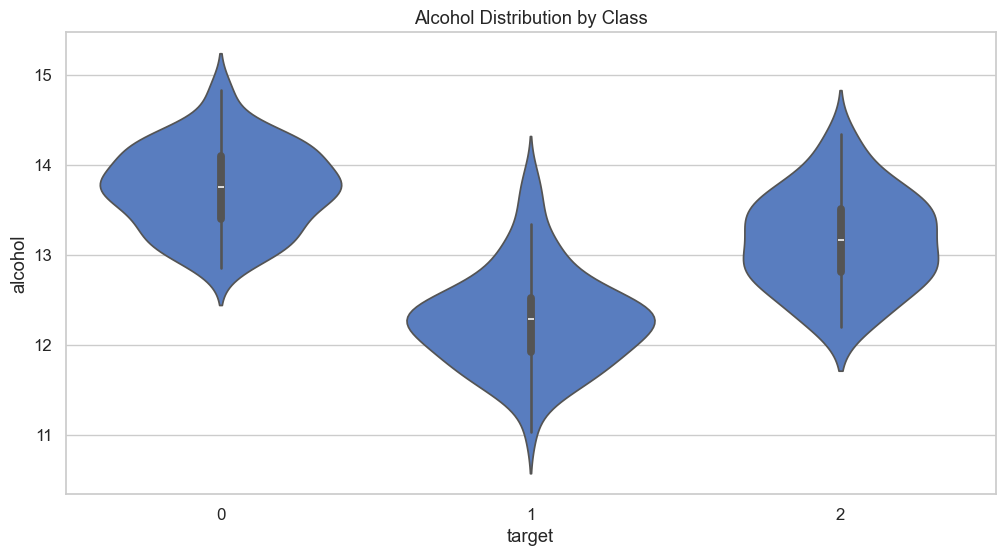

In [4]:
# ЗАДАЧА 2.2: Визуализация данных
# Создайте несколько графиков для понимания структуры данных

# ПОДСКАЗКА: Используйте pairplot для изучения связей между признаками
# ПОДСКАЗКА: Создайте correlation heatmap для анализа корреляций
# ПОДСКАЗКА: Постройте boxplot для выявления выбросов

# ВАШ КОД ЗДЕСЬ (создайте 3-4 различных графика):
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Загружаем данные
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ==== 1. Pairplot (изучение связей между признаками) ====
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue="target", diag_kind="kde")
plt.show()

# ==== 2. Корреляционная матрица (heatmap) ====
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# ==== 3. Boxplot для выявления выбросов ====
plt.figure(figsize=(14, 7))
sns.boxplot(data=df.drop(columns=["target"]))
plt.xticks(rotation=45)
plt.title("Boxplot of Wine Features")
plt.show()

# ==== 4. Violinplot для распределения по классам ====
plt.figure(figsize=(12, 6))
sns.violinplot(x="target", y="alcohol", data=df)
plt.title("Alcohol Distribution by Class")
plt.show()


# ВОПРОСЫ для анализа:
# 1. Какие признаки наиболее коррелированы?
# 2. Есть ли явные выбросы в данных?
# 3. Видны ли естественные группировки в данных?
# 4. Нужна ли стандартизация признаков?

In [5]:
# ЗАДАЧА 2.3: Предобработка данных
# Подготовьте данные для алгоритмов обучения без учителя

# ПОДСКАЗКА: Алгоритмы кластеризации чувствительны к масштабу
# ПОДСКАЗКА: Используйте StandardScaler или MinMaxScaler
# ПОДСКАЗКА: Сохраните исходные данные для интерпретации

# ВАШ КОД ЗДЕСЬ:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd

# === 1. Загрузка данных ===
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

# === 2. Отделение признаков от целевой переменной ===
X_original = df.drop(columns=["target"])   # исходные признаки
y_true = df["target"]                      # истинные классы

# === 3. Стандартизация признаков ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Превратим в DataFrame для удобства
X_scaled = pd.DataFrame(X_scaled, columns=wine.feature_names)

# === 4. Проверка результата стандартизации ===
print("=== Средние значения после стандартизации (должны быть ~0) ===")
print(X_scaled.mean())

print("\n=== Стандартные отклонения после стандартизации (должны быть ~1) ===")
print(X_scaled.std())

print("\n=== Первые строки стандартизованных данных ===")
print(X_scaled.head())



# ЗАДАНИЕ: Создайте две версии данных:
# - X_scaled: стандартизированные данные для алгоритмов
# - X_original: исходные данные для интерпретации
# - y_true: истинные метки классов (для валидации)

=== Средние значения после стандартизации (должны быть ~0) ===
alcohol                         7.841418e-15
malic_acid                      2.444986e-16
ash                            -4.059175e-15
alcalinity_of_ash              -7.110417e-17
magnesium                      -2.494883e-17
total_phenols                  -1.955365e-16
flavanoids                      9.443133e-16
nonflavanoid_phenols           -4.178929e-16
proanthocyanins                -1.540590e-15
color_intensity                -4.129032e-16
hue                             1.398382e-15
od280/od315_of_diluted_wines    2.126888e-15
proline                        -6.985673e-17
dtype: float64

=== Стандартные отклонения после стандартизации (должны быть ~1) ===
alcohol                         1.002821
malic_acid                      1.002821
ash                             1.002821
alcalinity_of_ash               1.002821
magnesium                       1.002821
total_phenols                   1.002821
flavanoids           

## БЛОК 3: Кластеризация - K-Means

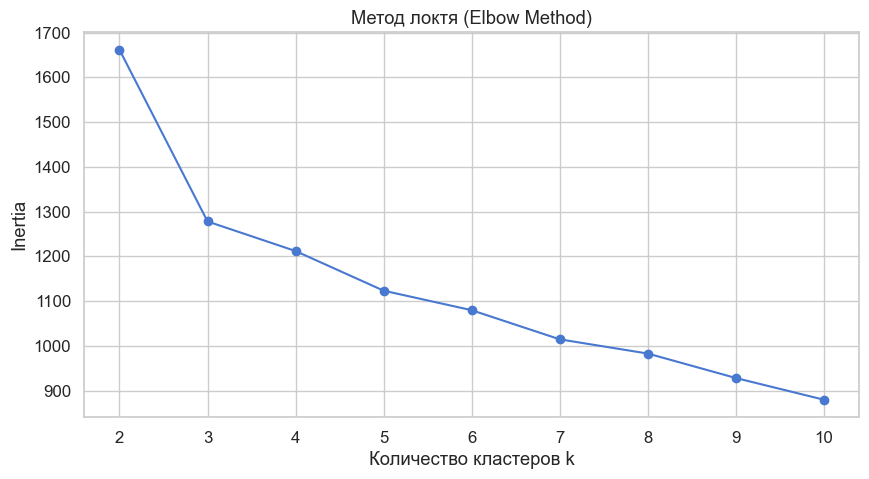

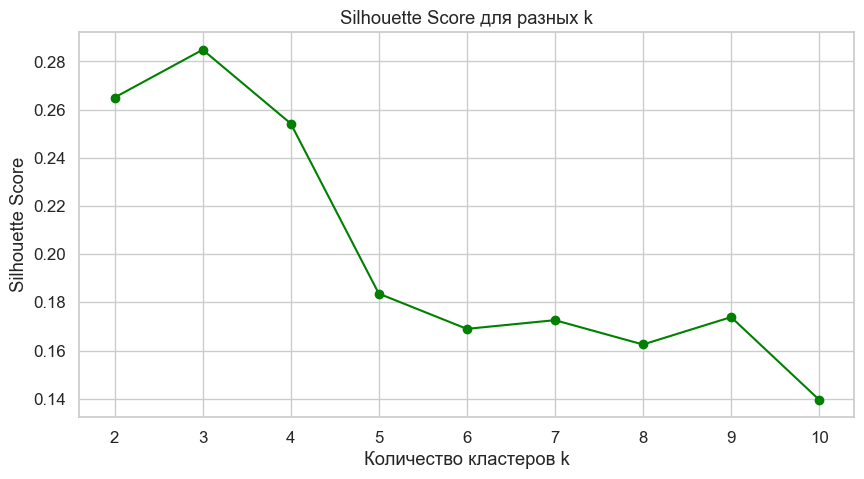

Inertia: [1661.6761165626506, 1277.928488844642, 1211.7531134671583, 1123.1565470796963, 1079.538509158826, 1014.4309086924652, 982.6549762937698, 927.9560760726213, 879.4257007542495]
Silhouette scores: [0.2650328591008738, 0.28485891918989864, 0.25422758316007776, 0.1836210510769814, 0.16899191019013057, 0.17260155610949213, 0.16250411307671145, 0.1738739334545086, 0.13956723664297552]


In [6]:
# ЗАДАЧА 3.1: Определение оптимального количества кластеров
# Используйте метод локтя и анализ силуэта

# ПОДСКАЗКА: Протестируйте k от 2 до 10
# ПОДСКАЗКА: Сохраните значения inertia и silhouette_score
# ПОДСКАЗКА: Постройте графики для визуального анализа

# ВАШ КОД ЗДЕСЬ:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Используем данные после стандартизации
X = X_scaled.copy()

inertias = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    inertia = kmeans.inertia_
    inertias.append(inertia)
    
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

# ====== ГРАФИК 1: Метод локтя ======
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Метод локтя (Elbow Method)")
plt.xlabel("Количество кластеров k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# ====== ГРАФИК 2: Silhouette Score ======
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score для разных k")
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

print("Inertia:", inertias)
print("Silhouette scores:", silhouette_scores)



# ВОПРОС: Какое количество кластеров кажется оптимальным и почему?

In [7]:
# ЗАДАЧА 3.2: Применение K-Means с оптимальным k
# Выполните кластеризацию и проанализируйте результаты

# ПОДСКАЗКА: Используйте найденное оптимальное k
# ПОДСКАЗКА: Установите random_state для воспроизводимости
# ПОДСКАЗКА: Получите метки кластеров и центроиды

# ВАШ КОД ЗДЕСЬ:
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score
)

# === 1. Оптимальное k ===
optimal_k = 3  # если нужно, поменяй вручную

# === 2. Модель KMeans ===
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# === 3. Метрики качества ===
silhouette = silhouette_score(X_scaled, cluster_labels)
calinski = calinski_harabasz_score(X_scaled, cluster_labels)
davies = davies_bouldin_score(X_scaled, cluster_labels)
ari = adjusted_rand_score(y_true, cluster_labels)

# === 4. Вывод результатов ===
print("=== K-Means (k = {}) ===".format(optimal_k))
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski)
print("Davies-Bouldin Index:", davies)
print("Adjusted Rand Index:", ari)

# === 5. Вывод центроидов ===
print("\nCluster Centers (in scaled space):")
print(kmeans.cluster_centers_)



# ЗАДАНИЕ: Вычислите и выведите:
# - Silhouette Score
# - Calinski-Harabasz Index
# - Davies-Bouldin Index
# - Adjusted Rand Index (сравнение с истинными метками)

=== K-Means (k = 3) ===
Silhouette Score: 0.2848589191898987
Calinski-Harabasz Index: 70.9400080031512
Davies-Bouldin Index: 1.3891879777181646
Adjusted Rand Index: 0.8974949815093207

Cluster Centers (in scaled space):
[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]


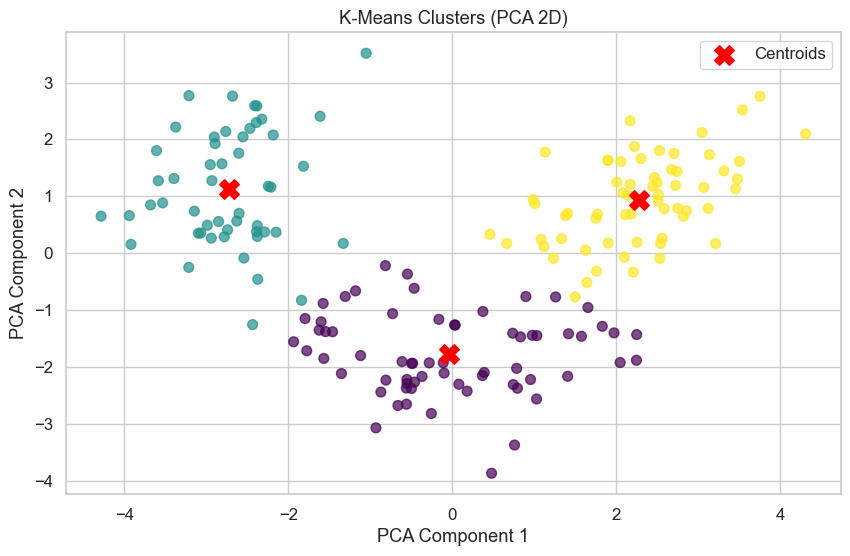

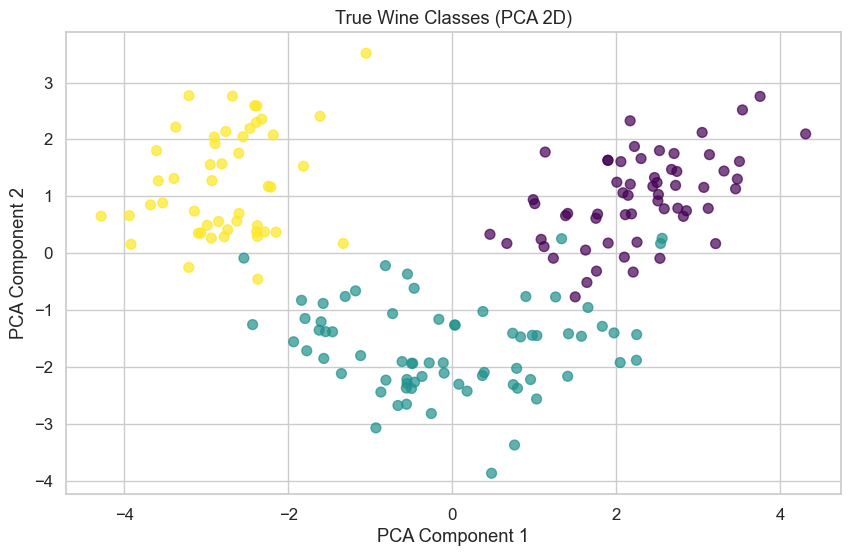

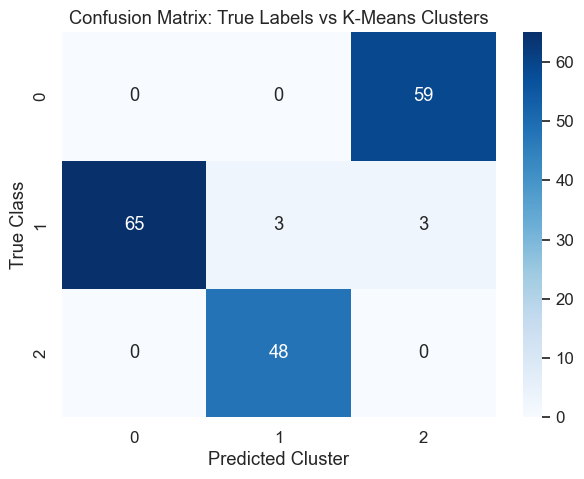

Confusion Matrix:
 [[ 0  0 59]
 [65  3  3]
 [ 0 48  0]]


In [8]:
# ЗАДАЧА 3.3: Визуализация результатов K-Means
# Создайте информативные графики кластеризации

# ПОДСКАЗКА: Используйте PCA для снижения размерности до 2D
# ПОДСКАЗКА: Покажите центроиды кластеров
# ПОДСКАЗКА: Сравните с истинной разметкой

# ВАШ КОД ЗДЕСЬ:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# === 1. PCA до 2 компонент ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# центроиды тоже нужно преобразовать в PCA-пространство
centroids_pca = pca.transform(kmeans.cluster_centers_)

# === 2. График кластеров K-Means ===
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clusters (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# === 3. График истинных меток ===
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
plt.title("True Wine Classes (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# === 4. Confusion Matrix ===
cm = confusion_matrix(y_true, cluster_labels)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: True Labels vs K-Means Clusters")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Class")
plt.show()

print("Confusion Matrix:\n", cm)



# БОНУС: Создайте confusion matrix между истинными и предсказанными кластерами

## БЛОК 4: Иерархическая кластеризация

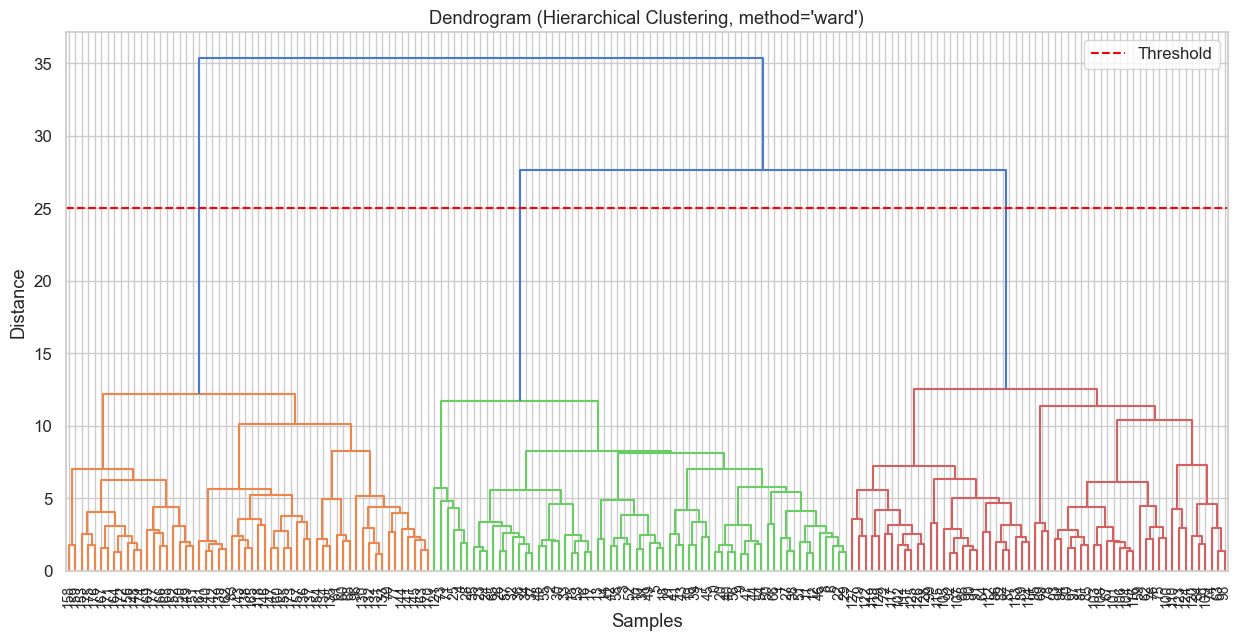

In [9]:
# ЗАДАЧА 4.1: Построение дендрограммы
# Создайте иерархическую кластеризацию и постройте дендрограмму

# ПОДСКАЗКА: Используйте linkage() для построения связей
# ПОДСКАЗКА: Попробуйте разные методы: 'ward', 'complete', 'average'
# ПОДСКАЗКА: Постройте дендрограмму с помощью dendrogram()

# ВАШ КОД ЗДЕСЬ:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# === 1. Выполняем иерархическую кластеризацию методом 'ward' ===
Z = linkage(X_scaled, method='ward')

# === 2. Построение дендрограммы ===
plt.figure(figsize=(15, 7))
dendrogram(
    Z,
    truncate_mode=None,       # показывать всю структуру
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Dendrogram (Hierarchical Clustering, method='ward')")
plt.xlabel("Samples")
plt.ylabel("Distance")

# === 3. Горизонтальная линия (выбор количества кластеров) ===
# Обычно линия рисуется чуть ниже большого скачка
plt.axhline(y=25, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.show()


# ВОПРОС: Сколько кластеров предлагает дендрограмма?

In [11]:
# ЗАДАЧА 4.2: Сравнение методов связывания
# Сравните результаты разных методов иерархической кластеризации

# ПОДСКАЗКА: Используйте AgglomerativeClustering из sklearn
# ПОДСКАЗКА: Сравните 'ward', 'complete', 'average', 'single'
# ПОДСКАЗКА: Вычислите метрики качества для каждого метода

# ВАШ КОД ЗДЕСЬ:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score
)
import pandas as pd

# === 1. Настройки методов связывания ===
linkage_methods = ["ward", "complete", "average", "single"]

results = []

for method in linkage_methods:

    # Настройка параметров в зависимости от метода
    if method == "ward":
        model = AgglomerativeClustering(
            n_clusters=3,
            linkage="ward"
            # metric нельзя указывать для ward — он принудительно 'euclidean'
        )
    else:
        model = AgglomerativeClustering(
            n_clusters=3,
            linkage=method,
            metric="euclidean"
        )

    labels = model.fit_predict(X_scaled)

    # Метрики качества
    silhouette = silhouette_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)
    davies = davies_bouldin_score(X_scaled, labels)
    ari = adjusted_rand_score(y_true, labels)

    results.append([method, silhouette, calinski, davies, ari])

# === 4. Таблица результатов ===
df_results = pd.DataFrame(
    results,
    columns=["Linkage", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin", "ARI"]
)

print(df_results)

# ЗАДАНИЕ: Какой метод показывает лучшие результаты?

    Linkage  Silhouette  Calinski-Harabasz  Davies-Bouldin       ARI
0      ward    0.277444          67.647468        1.418592  0.789933
1  complete    0.203787          48.989830        1.896096  0.577144
2   average    0.157525           4.031439        1.029890 -0.005442
3    single    0.182738           4.061665        0.910518 -0.006814


## БЛОК 5: DBSCAN - плотностная кластеризация

min_samples = 14


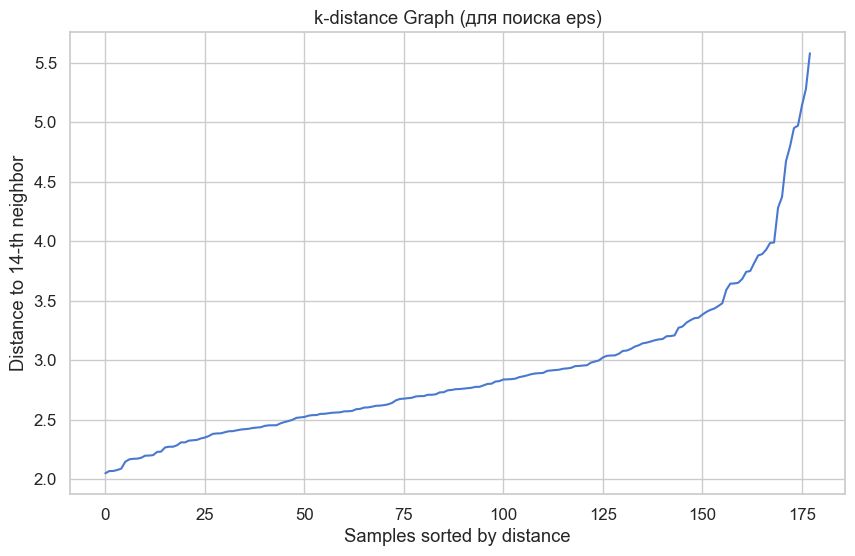

In [12]:
# ЗАДАЧА 5.1: Подбор параметров для DBSCAN
# Найдите оптимальные eps и min_samples

# ПОДСКАЗКА: Используйте метод k-расстояний для поиска eps
# ПОДСКАЗКА: Постройте график k-расстояний и найдите "локоть"
# ПОДСКАЗКА: min_samples обычно равен размерности + 1

# ВАШ КОД ЗДЕСЬ:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Используем стандартизированные данные
X = X_scaled.values

# === 1. min_samples по правилу размерности ===
min_samples = X.shape[1] + 1
print("min_samples =", min_samples)

# === 2. Поиск расстояний до k-го соседа ===
# k = min_samples
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# расстояние до k-го соседа (последняя колонка)
k_distances = distances[:, -1]

# === 3. Сортировка расстояний ===
k_distances_sorted = np.sort(k_distances)

# === 4. Построение k-расстояний ===
plt.figure(figsize=(10, 6))
plt.plot(k_distances_sorted)
plt.title("k-distance Graph (для поиска eps)")
plt.xlabel("Samples sorted by distance")
plt.ylabel(f"Distance to {min_samples}-th neighbor")
plt.grid(True)
plt.show()



# ПОДСКАЗКА: Для поиска k-ближайших соседей используйте NearestNeighbors
from sklearn.neighbors import NearestNeighbors

In [13]:
# ЗАДАЧА 5.2: Применение DBSCAN
# Выполните кластеризацию с найденными параметрами

# ПОДСКАЗКА: DBSCAN может находить выбросы (метка -1)
# ПОДСКАЗКА: Количество кластеров определяется автоматически
# ПОДСКАЗКА: Проанализируйте количество шумовых точек

# ВАШ КОД ЗДЕСЬ:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# === 1. Параметры DBSCAN ===
eps_value = 0.55   # <-- поменяй на значение из графика локтя
min_samples = X_scaled.shape[1] + 1  # d + 1 (13 + 1 = 14)

print("Using parameters: eps =", eps_value, ", min_samples =", min_samples)

# === 2. Модель DBSCAN ===
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
db_labels = dbscan.fit_predict(X_scaled)

# === 3. Анализ кластеров ===

# найденные метки
unique_labels = set(db_labels)

# количество шумовых точек (label = -1)
noise_count = list(db_labels).count(-1)

# размеры кластеров
cluster_sizes = pd.Series(db_labels).value_counts().sort_index()

print("\n=== DBSCAN RESULTS ===")
print("Unique cluster labels:", unique_labels)
print("Number of clusters (excluding noise):", len(unique_labels) - (1 if -1 in unique_labels else 0))
print("Noise points:", noise_count)
print("\nCluster sizes:")
print(cluster_sizes)


# ЗАДАНИЕ: Сравните результаты DBSCAN с K-Means
print("\n=== СРАВНЕНИЕ DBSCAN vs K-Means ===")

# количество кластеров
dbscan_cluster_count = len(unique_labels) - (1 if -1 in unique_labels else 0)
kmeans_cluster_count = len(set(cluster_labels))  # из предыдущей задачи

print("DBSCAN clusters:", dbscan_cluster_count)
print("K-Means clusters:", kmeans_cluster_count)

# шумовые точки
print("DBSCAN noise points:", noise_count)
print("K-Means noise points: 0 (не бывает у K-Means)")


Using parameters: eps = 0.55 , min_samples = 14

=== DBSCAN RESULTS ===
Unique cluster labels: {np.int64(-1)}
Number of clusters (excluding noise): 0
Noise points: 178

Cluster sizes:
-1    178
Name: count, dtype: int64

=== СРАВНЕНИЕ DBSCAN vs K-Means ===
DBSCAN clusters: 0
K-Means clusters: 3
DBSCAN noise points: 178
K-Means noise points: 0 (не бывает у K-Means)


## БЛОК 6: Снижение размерности

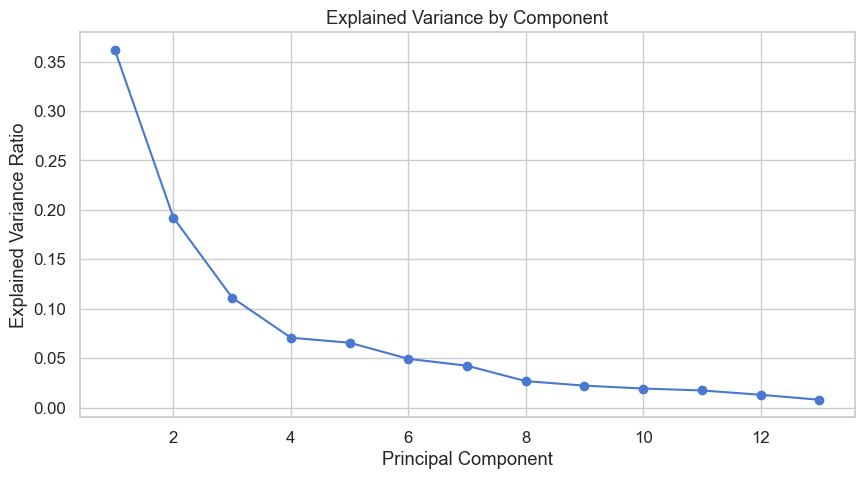

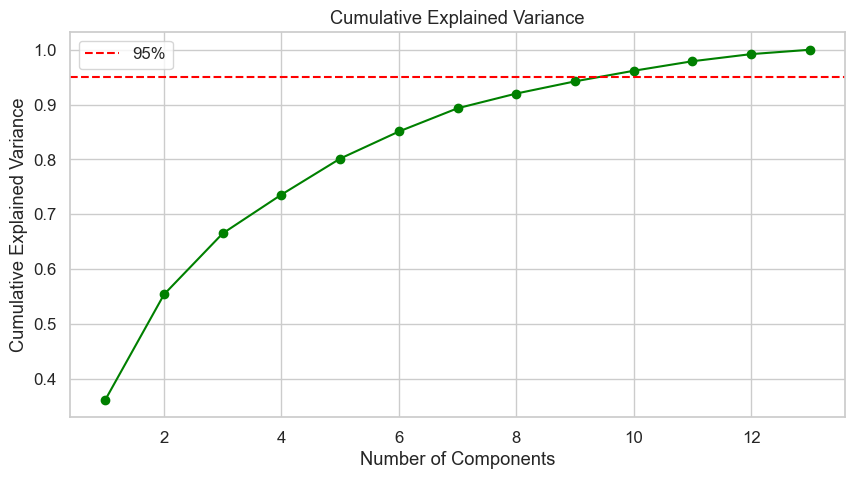

Number of components for 95% variance: 10

=== PCA Loadings (вклад признаков в главные компоненты) ===
                                   PC1       PC2       PC3       PC4  \
alcohol                       0.144329  0.483652 -0.207383 -0.017856   
malic_acid                   -0.245188  0.224931  0.089013  0.536890   
ash                          -0.002051  0.316069  0.626224 -0.214176   
alcalinity_of_ash            -0.239320 -0.010591  0.612080  0.060859   
magnesium                     0.141992  0.299634  0.130757 -0.351797   
total_phenols                 0.394661  0.065040  0.146179  0.198068   
flavanoids                    0.422934 -0.003360  0.150682  0.152295   
nonflavanoid_phenols         -0.298533  0.028779  0.170368 -0.203301   
proanthocyanins               0.313429  0.039302  0.149454  0.399057   
color_intensity              -0.088617  0.529996 -0.137306  0.065926   
hue                           0.296715 -0.279235  0.085222 -0.427771   
od280/od315_of_diluted_wines  0.3

In [14]:
# ЗАДАЧА 6.1: Анализ главных компонент (PCA)
# Выполните PCA и проанализируйте объясненную дисперсию

# ПОДСКАЗКА: Сначала постройте график explained variance ratio
# ПОДСКАЗКА: Определите, сколько компонент объясняют 95% дисперсии
# ПОДСКАЗКА: Изучите loadings (веса признаков) в главных компонентах

# ВАШ КОД ЗДЕСЬ:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === 1. PCA на все признаки ===
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# === 2. График объясненной дисперсии ===
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Component")
plt.grid(True)
plt.show()

# === 3. Кумулятивная дисперсия ===
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance")
plt.axhline(y=0.95, color='red', linestyle='--', label='95%')
plt.legend()
plt.grid(True)
plt.show()

# === 4. Количество компонент для 95% дисперсии ===
components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components for 95% variance:", components_95)

# === 5. Loadings (веса признаков) ===
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=X_original.columns
)

print("\n=== PCA Loadings (вклад признаков в главные компоненты) ===")
print(loadings)



# ВОПРОС: Сколько главных компонент нужно для объяснения 95% дисперсии?

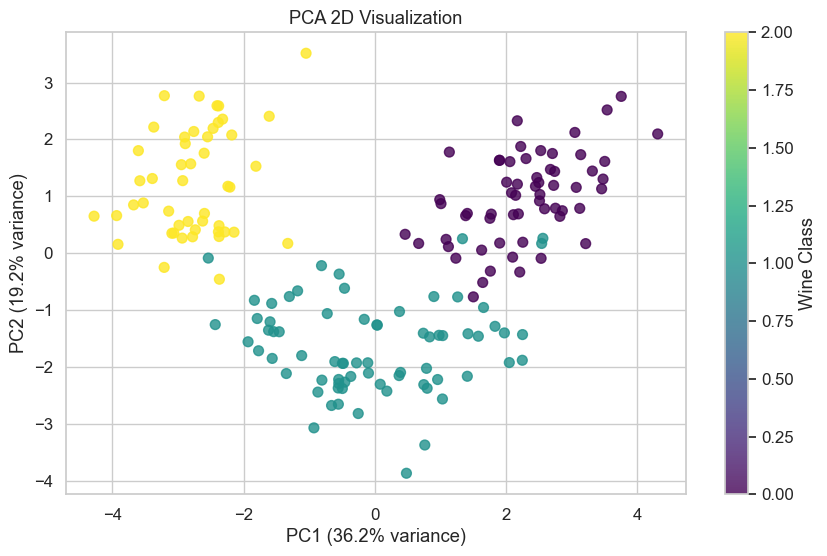

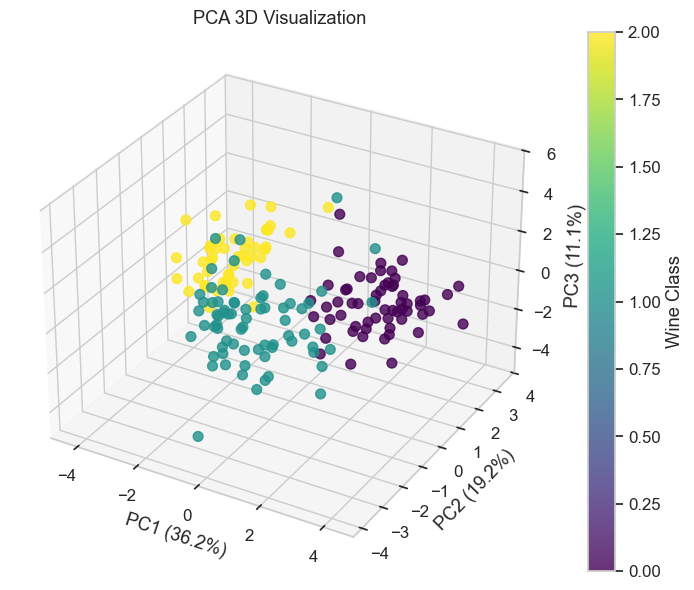

In [15]:
# ЗАДАЧА 6.2: Визуализация в пространстве главных компонент
# Создайте визуализацию данных в 2D и 3D

# ПОДСКАЗКА: Используйте первые 2-3 главные компоненты
# ПОДСКАЗКА: Покрасьте точки по истинным классам
# ПОДСКАЗКА: Добавьте информацию о объясненной дисперсии на оси

# ВАШ КОД ЗДЕСЬ:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# === 1. PCA для 2D и 3D ===
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

explained_2d = pca_2d.explained_variance_ratio_
explained_3d = pca_3d.explained_variance_ratio_

# === 2. 2D визуализация ===
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca_2d[:, 0],
    X_pca_2d[:, 1],
    c=y_true,
    cmap='viridis',
    alpha=0.8,
    s=50
)

plt.xlabel(f"PC1 ({explained_2d[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_2d[1]*100:.1f}% variance)")
plt.title("PCA 2D Visualization")
plt.colorbar(scatter, label="Wine Class")
plt.grid(True)
plt.show()

# === 3. 3D визуализация ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter_3d = ax.scatter(
    X_pca_3d[:, 0],
    X_pca_3d[:, 1],
    X_pca_3d[:, 2],
    c=y_true,
    cmap='viridis',
    s=50,
    alpha=0.8
)

ax.set_xlabel(f"PC1 ({explained_3d[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({explained_3d[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({explained_3d[2]*100:.1f}%)")
ax.set_title("PCA 3D Visualization")

fig.colorbar(scatter_3d, label="Wine Class")
plt.show()



# ЗАДАНИЕ: Хорошо ли разделяются классы в пространстве главных компонент?

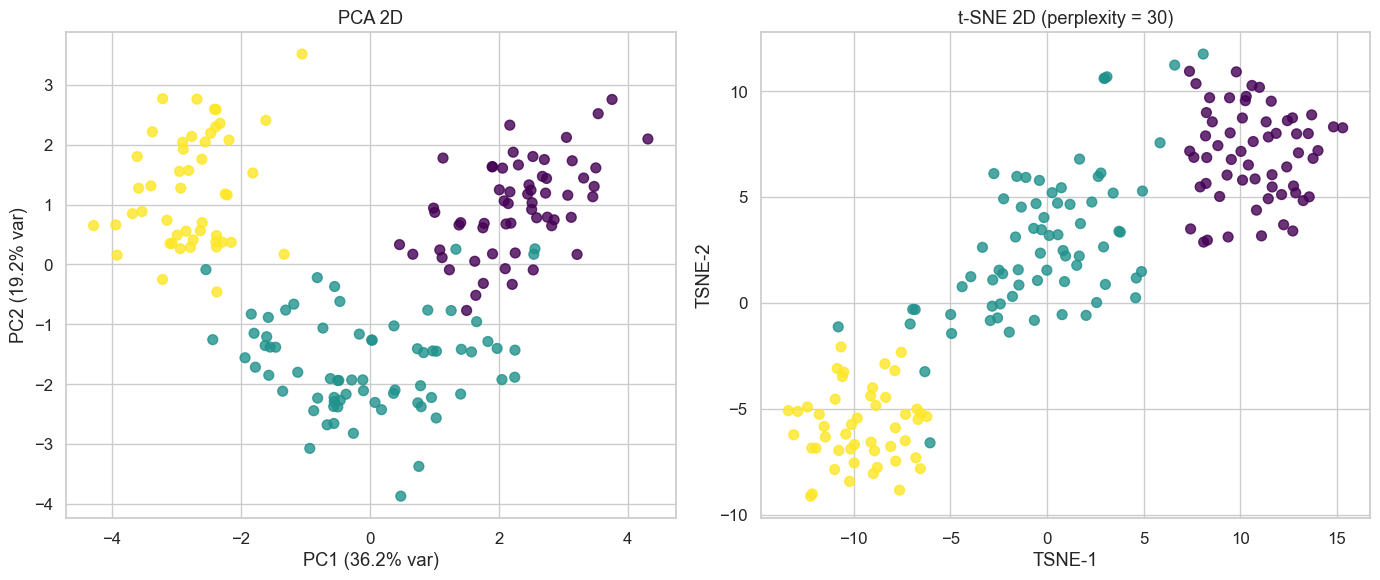

In [17]:
# ЗАДАЧА 6.3: Сравнение с t-SNE
# Примените t-SNE и сравните с PCA

# ПОДСКАЗКА: t-SNE лучше сохраняет локальную структуру
# ПОДСКАЗКА: Попробуйте разные значения perplexity (5-50)
# ПОДСКАЗКА: t-SNE может занять некоторое время

# ВАШ КОД ЗДЕСЬ:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# === 1. Применяем t-SNE ===
tsne = TSNE(
    n_components=2,
    perplexity=30,      # можно варьировать 5–50
    learning_rate=200,
    max_iter=1000,      # <-- исправлено!
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

# === 2. Subplots: PCA vs t-SNE ===
plt.figure(figsize=(14, 6))

# --- PCA subplot ---
plt.subplot(1, 2, 1)
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.8)
plt.title("PCA 2D")
plt.xlabel(f"PC1 ({explained_2d[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({explained_2d[1]*100:.1f}% var)")
plt.grid(True)

# --- t-SNE subplot ---
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.8)
plt.title(f"t-SNE 2D (perplexity = 30)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)

plt.tight_layout()
plt.show()


# ВОПРОС: Какой метод лучше разделяет классы визуально?

## БЛОК 7: Обнаружение аномалий

Размер исходных данных: (178, 13)
Размер после добавления аномалий: (190, 13)


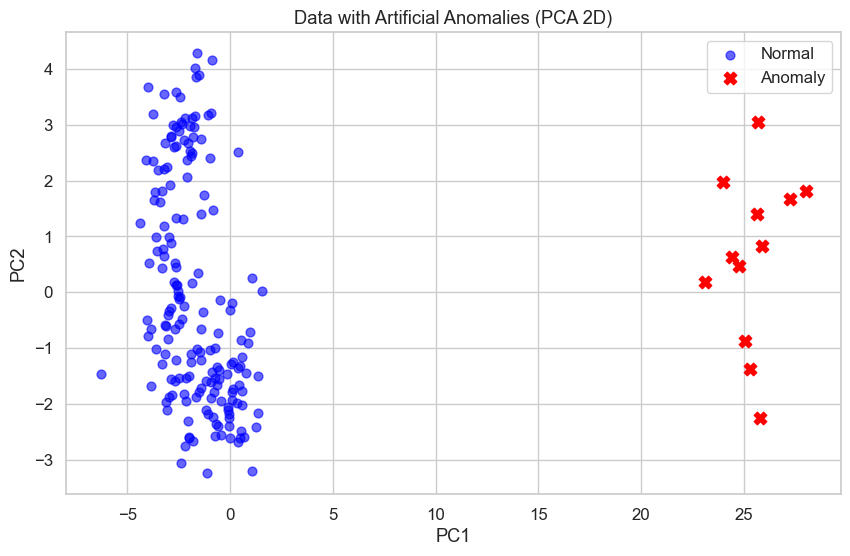

In [18]:
# ЗАДАЧА 7.1: Подготовка данных с аномалиями
# Создайте датасет с искусственными аномалиями

# ПОДСКАЗКА: Добавьте несколько выбросов к существующим данным
# ПОДСКАЗКА: Используйте np.random для генерации аномальных точек
# ПОДСКАЗКА: Сохраните информацию о том, какие точки аномальные

# ВАШ КОД ЗДЕСЬ:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Копия исходных данных ===
X_anom = X_scaled.copy().values
n_samples, n_features = X_anom.shape

# === 2. Создаём 10–15 аномальных точек ===
n_anomalies = 12  # можно изменить на 10–15

# Аномалии будем генерировать далеко за пределами нормальных значений (3-6 сигм)
anom_points = np.random.uniform(
    low=5, high=10,
    size=(n_anomalies, n_features)
)

# Добавляем аномалии в датасет
X_combined = np.vstack([X_anom, anom_points])

# === 3. Метки: 1 — нормальные, -1 — аномалии ===
labels = np.ones(len(X_combined))
labels[-n_anomalies:] = -1   # последние точки — аномальные

print("Размер исходных данных:", X_anom.shape)
print("Размер после добавления аномалий:", X_combined.shape)

# === 4. PCA для визуализации ===
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

# === 5. Визуализация ===
plt.figure(figsize=(10, 6))

plt.scatter(
    X_pca[labels == 1, 0],
    X_pca[labels == 1, 1],
    c='blue', s=40, alpha=0.6, label='Normal'
)

plt.scatter(
    X_pca[labels == -1, 0],
    X_pca[labels == -1, 1],
    c='red', s=80, marker='X', label='Anomaly'
)

plt.title("Data with Artificial Anomalies (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()



# Используйте первые 2 компоненты PCA для визуализации

In [19]:
# ЗАДАЧА 7.2: Применение алгоритмов обнаружения аномалий
# Сравните Isolation Forest, One-Class SVM и LOF

# ПОДСКАЗКА: Настройте contamination в соответствии с долей аномалий
# ПОДСКАЗКА: Для One-Class SVM попробуйте разные ядра
# ПОДСКАЗКА: Для LOF настройте количество соседей

# ВАШ КОД ЗДЕСЬ:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# === 1. Параметры ===
contamination = np.mean(labels == -1)  # доля аномалий в данных
print("Contamination:", contamination)

X = X_combined  # данные с аномалиями
y = labels      # 1 = нормальные, -1 = аномалии

results = []

# === 2. Isolation Forest ===
iso = IsolationForest(
    contamination=contamination,
    random_state=42
)
iso_pred = iso.fit_predict(X)

results.append([
    "Isolation Forest",
    accuracy_score(y, iso_pred),
    precision_score(y, iso_pred, pos_label=-1),
    recall_score(y, iso_pred, pos_label=-1),
    f1_score(y, iso_pred, pos_label=-1)
])

# === 3. One-Class SVM ===
ocsvm = OneClassSVM(
    kernel="rbf",
    gamma="scale",
    nu=contamination  # аналог contamination
)
ocsvm_pred = ocsvm.fit_predict(X)

results.append([
    "One-Class SVM (RBF)",
    accuracy_score(y, ocsvm_pred),
    precision_score(y, ocsvm_pred, pos_label=-1),
    recall_score(y, ocsvm_pred, pos_label=-1),
    f1_score(y, ocsvm_pred, pos_label=-1)
])

# === 4. Local Outlier Factor (LOF) ===
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=contamination,
    novelty=False
)
lof_pred = lof.fit_predict(X)

results.append([
    "LOF",
    accuracy_score(y, lof_pred),
    precision_score(y, lof_pred, pos_label=-1),
    recall_score(y, lof_pred, pos_label=-1),
    f1_score(y, lof_pred, pos_label=-1)
])

# === 5. Таблица результатов ===
df_results = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1"]
)
print(df_results)



# ЗАДАНИЕ: Какой алгоритм лучше обнаруживает аномалии?

Contamination: 0.06315789473684211
                 Model  Accuracy  Precision    Recall   F1
0     Isolation Forest  1.000000   1.000000  1.000000  1.0
1  One-Class SVM (RBF)  0.921053   0.384615  0.416667  0.4
2                  LOF  1.000000   1.000000  1.000000  1.0


## БЛОК 8: Комплексный анализ и интерпретация

              Algorithm  Silhouette       ARI       NMI  Time (s)
0          KMeans (k=3)    0.284859  0.897495  0.875894  0.011959
1  Agglomerative (Ward)    0.277444  0.789933  0.786465  0.003519
2                DBSCAN         NaN  0.000000  0.000000  0.004529


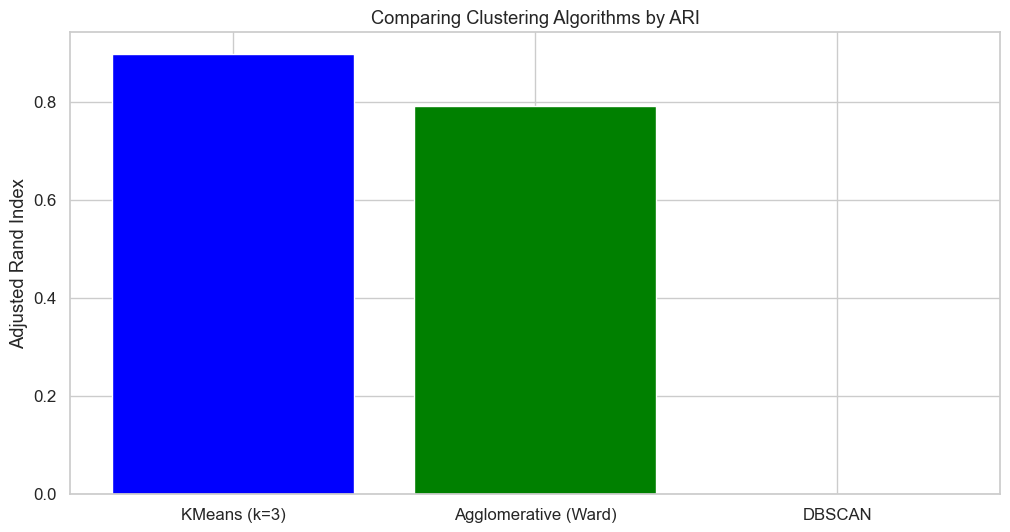

In [20]:
# ЗАДАЧА 8.1: Сравнение всех методов кластеризации
# Создайте сводную таблицу результатов

# ПОДСКАЗКА: Включите все вычисленные метрики
# ПОДСКАЗКА: Добавьте время выполнения алгоритмов
# ПОДСКАЗКА: Укажите оптимальные параметры для каждого метода

# ВАШ КОД ЗДЕСЬ:
import time
import pandas as pd
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# === Данные ===
X = X_scaled
y = y_true

results = []


# ===============================================================
# 1. KMEANS
# ===============================================================
start = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X)
end = time.time()

results.append([
    "KMeans (k=3)",
    silhouette_score(X, labels_kmeans),
    adjusted_rand_score(y, labels_kmeans),
    normalized_mutual_info_score(y, labels_kmeans),
    end - start
])


# ===============================================================
# 2. AGGLOMERATIVE (WARD)
# ===============================================================
start = time.time()
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X)
end = time.time()

results.append([
    "Agglomerative (Ward)",
    silhouette_score(X, labels_agg),
    adjusted_rand_score(y, labels_agg),
    normalized_mutual_info_score(y, labels_agg),
    end - start
])


# ===============================================================
# 3. DBSCAN
# ===============================================================
eps_value = 0.55  # подставь своё значение, найденное на шаге 5.1
min_samples = X.shape[1] + 1

start = time.time()
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
labels_db = dbscan.fit_predict(X)
end = time.time()

# фильтр для метрик Silhouette (нельзя считать, если только 1 кластер)
if len(set(labels_db)) > 1:
    sil = silhouette_score(X, labels_db)
else:
    sil = float('nan')

results.append([
    "DBSCAN",
    sil,
    adjusted_rand_score(y, labels_db),
    normalized_mutual_info_score(y, labels_db),
    end - start
])


# ===============================================================
# 4. СВОДНАЯ ТАБЛИЦА
# ===============================================================
df_results = pd.DataFrame(
    results,
    columns=["Algorithm", "Silhouette", "ARI", "NMI", "Time (s)"]
)

print(df_results)

# ===============================================================
# 5. ВИЗУАЛИЗАЦИЯ
# ===============================================================

plt.figure(figsize=(12, 6))
plt.bar(df_results["Algorithm"], df_results["ARI"], color=['blue','green','red'])
plt.ylabel("Adjusted Rand Index")
plt.title("Comparing Clustering Algorithms by ARI")
plt.grid(True, axis='y')
plt.show()



# ЗАДАНИЕ: Какой алгоритм показал лучшие результаты и почему?

           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  
cluster                                                                        
0               2.973077  1.062708                      2.803385   510.169231 

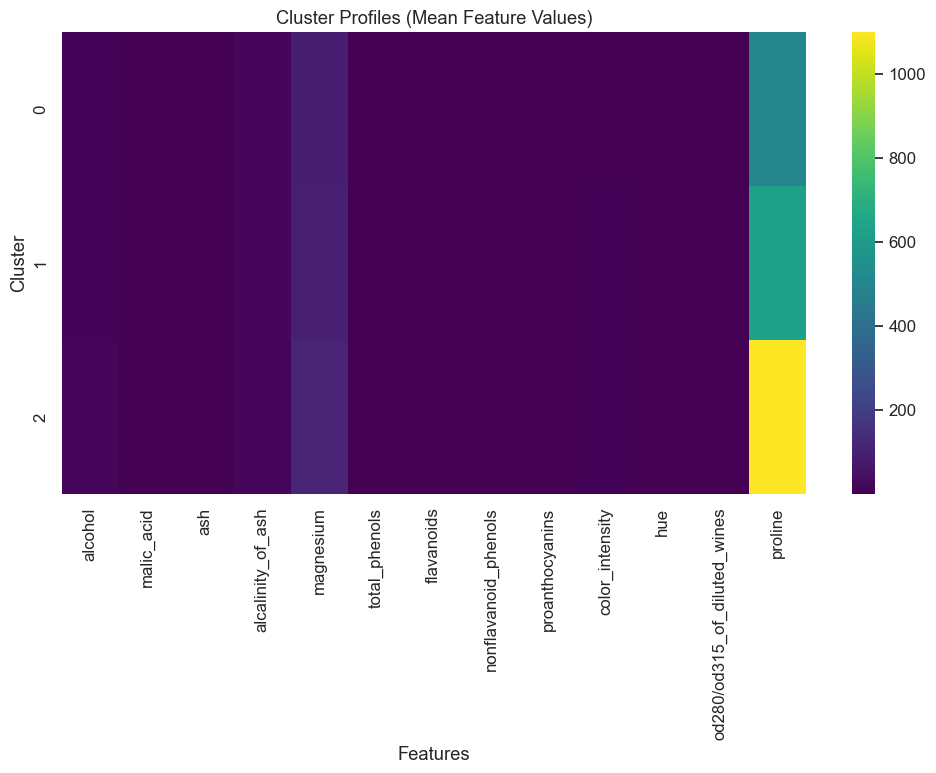

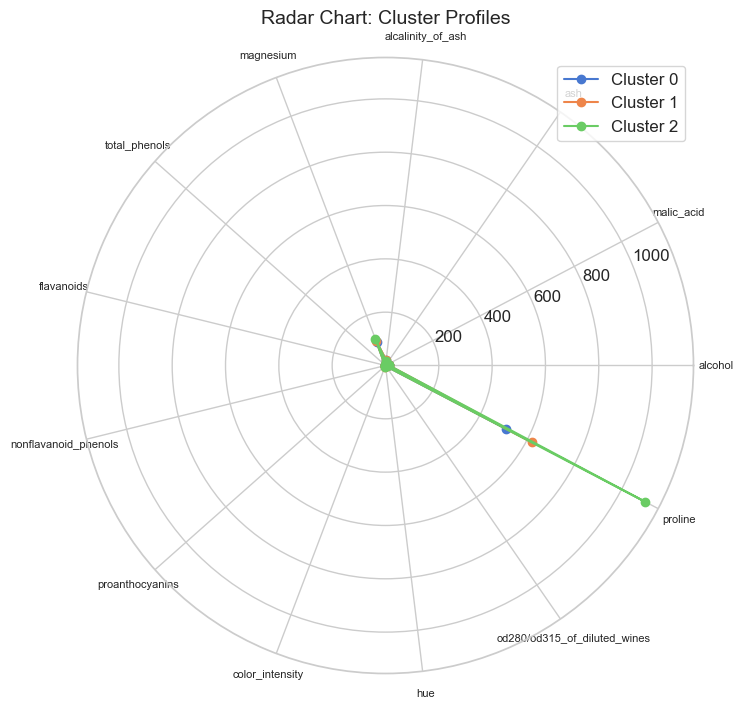

In [21]:
# ЗАДАЧА 8.2: Интерпретация кластеров
# Проанализируйте характеристики найденных кластеров

# ПОДСКАЗКА: Вычислите средние значения признаков по кластерам
# ПОДСКАЗКА: Создайте профили кластеров (radar charts)
# ПОДСКАЗКА: Определите наиболее важные признаки для разделения

# ВАШ КОД ЗДЕСЬ:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Средние значения признаков по кластерам ===
df_clusters = pd.DataFrame(X_original)
df_clusters["cluster"] = labels_kmeans

cluster_means = df_clusters.groupby("cluster").mean()
print(cluster_means)

# === 2. Heatmap профилей кластеров ===
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap="viridis", annot=False)
plt.title("Cluster Profiles (Mean Feature Values)")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

# === 3. Radar chart для кластеров ===

# Подготовка данных
features = X_original.columns
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # замкнуть круг

plt.figure(figsize=(12, 8))

for cluster_id in cluster_means.index:
    values = cluster_means.loc[cluster_id].tolist()
    values += values[:1]

    plt.polar(angles, values, marker='o', label=f"Cluster {cluster_id}")

plt.xticks(angles[:-1], features, fontsize=8)
plt.title("Radar Chart: Cluster Profiles", fontsize=14)
plt.legend(loc='upper right')
plt.show()


# ЗАДАНИЕ: Дайте интерпретацию каждому найденному кластеру